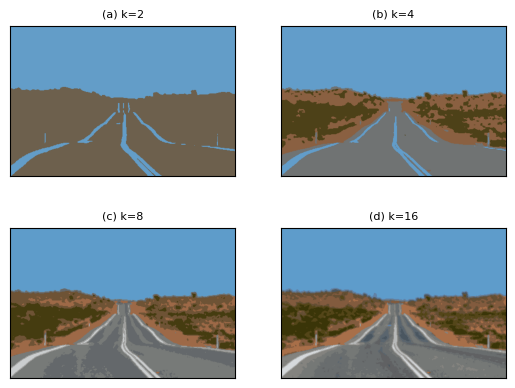

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('estrada.png') # Leitura e carregamento da imagem

img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Conversão de cores
Z = img.reshape((-1,3)) # Conversão de canais para carregamento e manipulacao

# Conversão para 32bit (Níveis de cinza de cda canal)
Z = np.float32(Z)

# Definição de critérios, como iterações e centros
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Define os títulos do plot
titles = ['(a) k=2', '(b) k=4', '(c) k=8', '(d) k=16']
ks = [2, 4, 8, 16] # Define os números de grupos
images = [0,0,0,0] # Inicializa o vetor das 4 imagens

for i in range(4): # For para plotar todas as imagens
    ## Kmeans
    # Define o número de partições
    K = ks[i]
    
    # Executa o KMeans em cada imagem
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
    
    ## Reconstrução de canais de cor
    center = np.uint8(center) # Conversão de cores para exibição
    res = center[label.flatten()] # Definição de centros
    images[i] = res.reshape((img.shape)) # Reconstrução de canais
    
    ## Plot
    
    # Define cada plot em seu lugar
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]),plt.yticks([])

plt.show() # Plota o resultado final 